# MiniLab 1: Fuel Consumption Analysis

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from isc301.config import fuel_consumption_raw_path

In [78]:
df = pd.read_csv(fuel_consumption_raw_path)
print(df.size)
df.head(100)

230958


,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km)
0,1995,Acura,Integra,Subcompact,1.8,4,A4,X,10.2,7.0,8.8,32,202
1,1995,Acura,Integra,Subcompact,1.8,4,M5,X,9.6,7.0,8.4,34,193
2,1995,Acura,Integra GS-R,Subcompact,1.8,4,M5,Z,9.4,7.0,8.3,34,191
3,1995,Acura,Legend,Compact,3.2,6,A4,Z,12.6,8.9,10.9,26,251
4,1995,Acura,Legend Coupe,Compact,3.2,6,A4,Z,13.0,9.3,11.3,25,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1995,Chevrolet,C2500,Pickup truck: Standard,5.0,8,M5,X,18.5,12.4,15.8,18,363
96,1995,Chevrolet,C2500,Pickup truck: Standard,5.7,8,A4,X,18.9,14.0,16.7,17,384
97,1995,Chevrolet,C2500,Pickup truck: Standard,5.7,8,M5,X,18.8,12.9,16.1,18,370
98,1995,Chevrolet,C2500,Pickup truck: Standard,5.7,8,M5,X,19.9,12.8,16.7,17,384


In [79]:
df.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km)
count,17766.000000,17766.000000,17766.000000,17766.000000,17766.000000,17766.000000,17766.000000,17766.000000
mean,2005.473826,3.452313,5.949679,12.986801,8.882072,11.140673,27.113644,251.355342
std,5.680831,1.326899,1.750799,3.484663,2.323127,2.930980,7.298329,60.220017
min,1995.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2001.000000,2.400000,4.000000,10.600000,7.300000,9.200000,22.000000,210.000000
50%,2006.000000,3.300000,6.000000,12.500000,8.300000,10.600000,27.000000,242.000000
75%,2010.000000,4.300000,8.000000,15.000000,10.300000,12.900000,31.000000,290.000000
max,2014.000000,8.400000,16.000000,30.600000,19.000000,24.800000,78.000000,570.000000


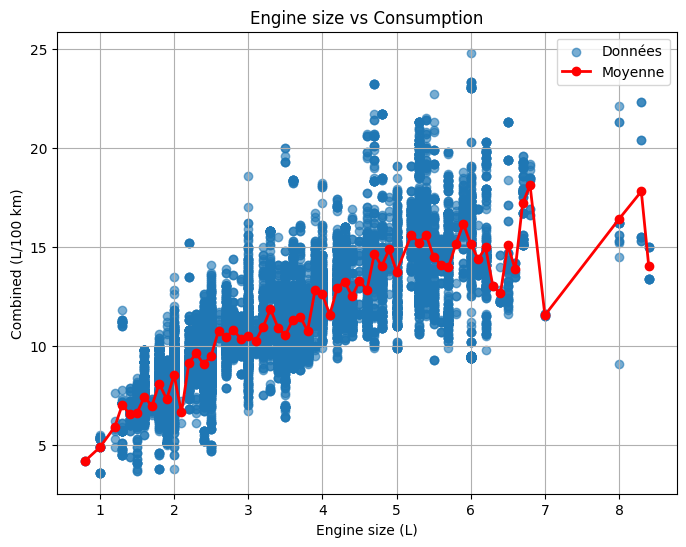

In [80]:
# Nuage de points
plt.figure(figsize=(8, 6))
plt.scatter(
    df["Engine size (L)"], df["Combined (L/100 km)"], alpha=0.6, label="Données"
)

# Moyenne de consommation par taille de moteur
mean_values = df.groupby("Engine size (L)")["Combined (L/100 km)"].mean()

# Tracé de la ligne reliant les moyennes
plt.plot(
    mean_values.index,
    mean_values.values,
    color="red",
    linewidth=2,
    marker="o",
    label="Moyenne",
)

# Labels et titre
plt.xlabel("Engine size (L)")
plt.ylabel("Combined (L/100 km)")
plt.title("Engine size vs Consumption")
plt.grid(True)
plt.legend()
plt.show()

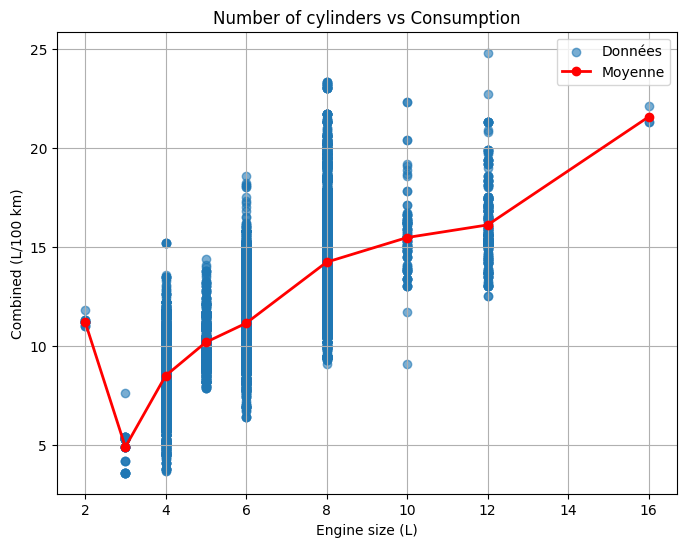

In [81]:
# Nuage de points
plt.figure(figsize=(8, 6))
plt.scatter(df["Cylinders"], df["Combined (L/100 km)"], alpha=0.6, label="Données")

# Moyenne de consommation par taille de moteur
mean_values = df.groupby("Cylinders")["Combined (L/100 km)"].mean()

# Tracé de la ligne reliant les moyennes
plt.plot(
    mean_values.index,
    mean_values.values,
    color="red",
    linewidth=2,
    marker="o",
    label="Moyenne",
)

# Labels et titre
plt.xlabel("Engine size (L)")
plt.ylabel("Combined (L/100 km)")
plt.title("Number of cylinders vs Consumption")
plt.grid(True)
plt.legend()
plt.show()

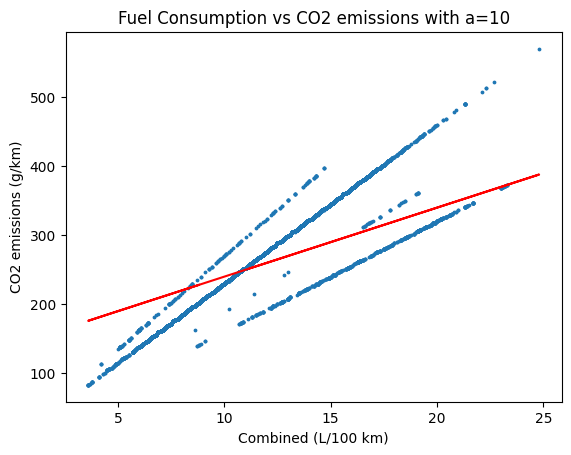

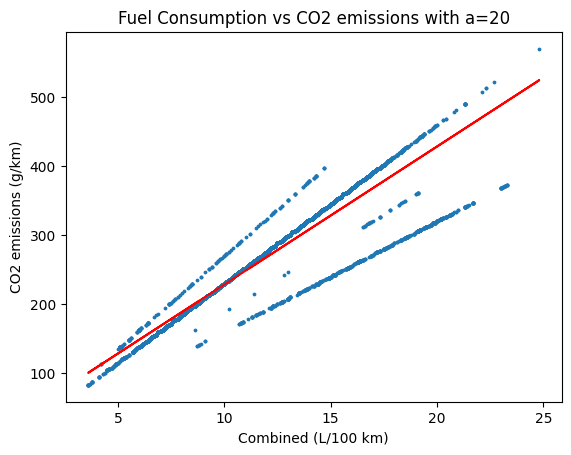

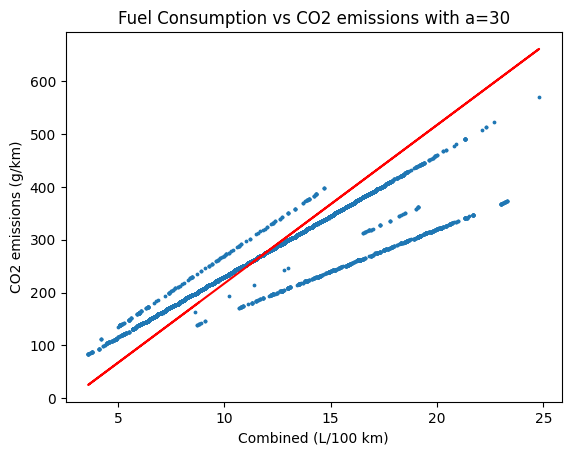

In [82]:
x = df["Combined (L/100 km)"]
y = df["CO2 emissions (g/km)"]
for a in [10, 20, 30]:
    b = (y - a * x).mean()
    y_pred = a * x + b
    plt.scatter(x, y, s=3)
    plt.plot(x, y_pred, color="red")
    plt.xlabel("Combined (L/100 km)")
    plt.ylabel("CO2 emissions (g/km)")
    plt.title(f"Fuel Consumption vs CO2 emissions with a={a}")
    plt.show()

# Best value of **a** variable
To find the minimal error, I'm using Mean Absolute Error **MAE**

$$\displaystyle Min(\frac{\sum_{i=1}^{N}(|y_{pred} - y_i|)}{N})$$

With this, then we can find the best a value.

In [99]:
x = df["Combined (L/100 km)"]
y = df["CO2 emissions (g/km)"]
lowest_err = np.inf
best_a = np.inf

for a in [a / 10.0 for a in range(200, 310, 1)]:
    b = (y - a * x).mean()
    y_pred = a * x + b
    err = np.abs((y_pred - y)).mean()
    if err < lowest_err:
        lowest_err = err
        best_a = a

print(lowest_err, ",", best_a)

9.554423982179989 , 21.8


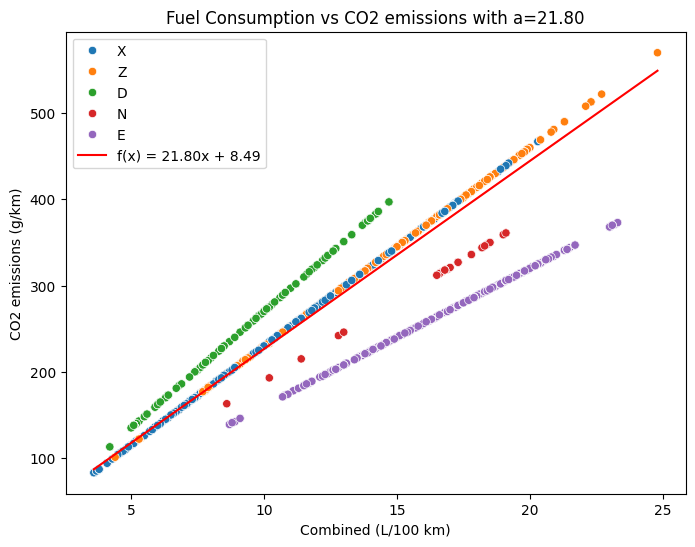

In [ ]:
# X = Regular gasoline
# Z = Premium gasoline
# D = Diesel
# E = E85
# N = Natural Gas for FFVs

a = best_a
b = (y - a * x).mean()
y_pred = a * x + b

plt.figure(figsize=(8, 6))

sns.scatterplot(df, x="Combined (L/100 km)", y="CO2 emissions (g/km)", hue="Fuel type")
sns.lineplot(x=x, y=y_pred, color="red", label=f"f(x) = {a:.2f}x + {b:.2f}")

plt.xlabel("Combined (L/100 km)")
plt.ylabel("CO2 emissions (g/km)")
plt.title(f"Fuel Consumption vs CO2 emissions with a={a:.2f}")
plt.legend()
plt.show()